# Prever Sobreviventes no Titanic (classificação binária)

### Importar das bibliotecas


In [3]:
import pandas as pd 

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')


### Ingestão de dados

https://code.datasciencedojo.com/datasciencedojo/datasets

In [4]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
dados_titanic = pd.read_csv(url)

dados_titanic.rename(columns={
    'PassengerId': 'IdPassageiro',
    'Survived': 'Sobreviveu',
    'Pclass': 'Classe',
    'Name': 'Nome',
    'Sex': 'Sexo',
    'Age': 'Idade',
    'SibSp': 'IrmaosConjuges',
    'Parch': 'PaisFilhos',
    'Ticket': 'Bilhete',
    'Fare': 'Tarifa',
    'Cabin': 'Cabine',
    'Embarked': 'Embarque'
}, inplace=True)

dados.head()

,IdPassageiro,Sobreviveu,Classe,Nome,Sexo,Idade,IrmaosConjuges,PaisFilhos,Bilhete,Tarifa,Cabine,Embarque
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Tratamento e Pré-processamento

In [5]:
dados_titanic.isnull().sum()

IdPassageiro        0
Sobreviveu          0
Classe              0
Nome                0
Sexo                0
Idade             177
IrmaosConjuges      0
PaisFilhos          0
Bilhete             0
Tarifa              0
Cabine            687
Embarque            2
dtype: int64

In [6]:
dados_titanic.head()

,IdPassageiro,Sobreviveu,Classe,Nome,Sexo,Idade,IrmaosConjuges,PaisFilhos,Bilhete,Tarifa,Cabine,Embarque
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
dados_titanic.Embarque.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [8]:
encoder = OneHotEncoder(sparse=False)
dados_categoricos = ['Sexo', 'Embarque']
dados_transformados = encoder.fit_transform(dados_titanic[dados_categoricos])

colunas_transformadas = encoder.get_feature_names_out(dados_categoricos)
dados_transformados_df = pd.DataFrame(dados_transformados, columns=colunas_transformadas)

,Sexo_female,Sexo_male,Embarque_C,Embarque_Q,Embarque_S,Embarque_nan
0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...
886,0.0,1.0,0.0,0.0,1.0,0.0
887,1.0,0.0,0.0,0.0,1.0,0.0
888,1.0,0.0,0.0,0.0,1.0,0.0
889,0.0,1.0,1.0,0.0,0.0,0.0


In [9]:
dados = dados_titanic.copy()

dados.drop(['Nome', 'Bilhete', 'Cabine'], axis=1, inplace=True)

imputador = SimpleImputer(strategy='median')
dados['Idade'] = imputador.fit_transform(dados[['Idade']])

dados['Embarque'].fillna(dados['Embarque'].mode()[0], inplace=True)

dados['TamanhoFamilia'] = dados['IrmaosConjuges'] + dados['PaisFilhos']
dados['EstaSozinho'] = (dados['TamanhoFamilia'] == 0).astype(int)

encoder = LabelEncoder()
dados['Sexo_Codificado'] = encoder.fit_transform(dados['Sexo'])
dados['Embarque_Codificado'] = encoder.fit_transform(dados['Embarque'])

dados.drop(['Sexo', 'Embarque'], axis=1, inplace=True)

caracteristicas = ['Idade', 'Tarifa', 'IrmaosConjuges', 'PaisFilhos', 'TamanhoFamilia']

scaler_standard = StandardScaler()
dados[caracteristicas] = scaler_standard.fit_transform(dados[caracteristicas])

scaler_minmax = MinMaxScaler()
dados[caracteristicas] = scaler_minmax.fit_transform(dados[caracteristicas])

dados_preprocessados = dados

dados.head()

,IdPassageiro,Sobreviveu,Classe,Idade,IrmaosConjuges,PaisFilhos,Tarifa,TamanhoFamilia,EstaSozinho,Sexo_Codificado,Embarque_Codificado
0,1,0,3,0.271174,0.125,0.0,0.014151,0.1,0,1,2
1,2,1,1,0.472229,0.125,0.0,0.139136,0.1,0,0,0
2,3,1,3,0.321438,0.000,0.0,0.015469,0.0,1,0,2
3,4,1,1,0.434531,0.125,0.0,0.103644,0.1,0,0,2
4,5,0,3,0.434531,0.000,0.0,0.015713,0.0,1,1,2


In [10]:
dados.isnull().sum()

IdPassageiro           0
Sobreviveu             0
Classe                 0
Idade                  0
IrmaosConjuges         0
PaisFilhos             0
Tarifa                 0
TamanhoFamilia         0
EstaSozinho            0
Sexo_Codificado        0
Embarque_Codificado    0
dtype: int64

In [11]:
def preprocess_data(dados):

    dados = dados_titanic.copy() 


    dados.drop(['Nome', 'Bilhete', 'Cabine'], axis=1, inplace=True)


    imputador = SimpleImputer(strategy='median')
    dados['Idade'] = imputador.fit_transform(dados[['Idade']])

    dados['Embarque'].fillna(dados['Embarque'].mode()[0], inplace=True)

    dados['TamanhoFamilia'] = dados['IrmaosConjuges'] + dados['PaisFilhos']
    dados['EstaSozinho'] = (dados['TamanhoFamilia'] == 0).astype(int)

    encoder = LabelEncoder()
    dados['Sexo_Codificado'] = encoder.fit_transform(dados['Sexo'])
    dados['Embarque_Codificado'] = encoder.fit_transform(dados['Embarque'])

    dados.drop(['Sexo', 'Embarque'], axis=1, inplace=True)

    caracteristicas = ['Idade', 'Tarifa', 'IrmaosConjuges', 'PaisFilhos', 'TamanhoFamilia']

    scaler_standard = StandardScaler()
    dados[caracteristicas] = scaler_standard.fit_transform(dados[caracteristicas])

    scaler_minmax = MinMaxScaler()
    dados[caracteristicas] = scaler_minmax.fit_transform(dados[caracteristicas])

    return dados

dados_preprocessados = preprocess_data(dados_titanic)

,IdPassageiro,Sobreviveu,Classe,Idade,IrmaosConjuges,PaisFilhos,Tarifa,TamanhoFamilia,EstaSozinho,Sexo_Codificado,Embarque_Codificado
0,1,0,3,0.271174,0.125,0.000000,0.014151,0.1,0,1,2
1,2,1,1,0.472229,0.125,0.000000,0.139136,0.1,0,0,0
2,3,1,3,0.321438,0.000,0.000000,0.015469,0.0,1,0,2
3,4,1,1,0.434531,0.125,0.000000,0.103644,0.1,0,0,2
4,5,0,3,0.434531,0.000,0.000000,0.015713,0.0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0.334004,0.000,0.000000,0.025374,0.0,1,1,2
887,888,1,1,0.233476,0.000,0.000000,0.058556,0.0,1,0,2
888,889,0,3,0.346569,0.125,0.333333,0.045771,0.3,0,0,2
889,890,1,1,0.321438,0.000,0.000000,0.058556,0.0,1,1,0


In [12]:
dados_preprocessados.isnull().sum()

IdPassageiro           0
Sobreviveu             0
Classe                 0
Idade                  0
IrmaosConjuges         0
PaisFilhos             0
Tarifa                 0
TamanhoFamilia         0
EstaSozinho            0
Sexo_Codificado        0
Embarque_Codificado    0
dtype: int64

In [13]:
dados_preprocessados.head()

,IdPassageiro,Sobreviveu,Classe,Idade,IrmaosConjuges,PaisFilhos,Tarifa,TamanhoFamilia,EstaSozinho,Sexo_Codificado,Embarque_Codificado
0,1,0,3,0.271174,0.125,0.0,0.014151,0.1,0,1,2
1,2,1,1,0.472229,0.125,0.0,0.139136,0.1,0,0,0
2,3,1,3,0.321438,0.000,0.0,0.015469,0.0,1,0,2
3,4,1,1,0.434531,0.125,0.0,0.103644,0.1,0,0,2
4,5,0,3,0.434531,0.000,0.0,0.015713,0.0,1,1,2


In [14]:
X = dados_preprocessados.drop(['IdPassageiro', 'Sobreviveu'], axis=1)
X.head()

,Classe,Idade,IrmaosConjuges,PaisFilhos,Tarifa,TamanhoFamilia,EstaSozinho,Sexo_Codificado,Embarque_Codificado
0,3,0.271174,0.125,0.0,0.014151,0.1,0,1,2
1,1,0.472229,0.125,0.0,0.139136,0.1,0,0,0
2,3,0.321438,0.000,0.0,0.015469,0.0,1,0,2
3,1,0.434531,0.125,0.0,0.103644,0.1,0,0,2
4,3,0.434531,0.000,0.0,0.015713,0.0,1,1,2


In [15]:
y = dados_preprocessados['Sobreviveu']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Sobreviveu, dtype: int64

In [16]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [17]:
dados_preprocessados.shape

(891, 11)

In [18]:
X_treino.shape

(712, 9)

In [19]:
X_teste.shape

(179, 9)

### Teste de Vários Modelos

Lista de Modelos a Serem Testados. 

### **Modelos de classificação binária**
- Regressão Logística
- Árvore de Decisão
- Random Forest
- KNN
- MLP
- Máquina de Vetores de Suporte (SVM)
- Gradient Boosting
- XGBoost

In [20]:
modelos = {
    'Regressão Logística': LogisticRegression(),
    'Árvore de Decisão': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'MLP': MLPClassifier(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

In [21]:
modelos

{'Regressão Logística': LogisticRegression(),
 'Árvore de Decisão': DecisionTreeClassifier(),
 'KNN': KNeighborsClassifier(),
 'MLP': MLPClassifier(max_iter=1000),
 'Random Forest': RandomForestClassifier(),
 'SVM': SVC(probability=True),
 'Gradient Boosting': GradientBoostingClassifier(),
 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric='logloss',
               feature_types=None, gamma=None, grow_policy=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=None, max_bin=None, max_cat_threshold=None,
               max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
               max_leaves=None, min_child_weight=None, missing=nan,
               monotone_constraints=None, multi_strategy=None, n_estimators=None,


In [22]:
resultados = []

for nome_modelo, modelo in modelos.items():
    modelo.fit(X_treino, y_treino)

    y_pred = modelo.predict(X_teste)

    acuracia = accuracy_score(y_teste, y_pred)
    auc  = roc_auc_score(y_teste, modelo.predict_proba(X_teste)[:, 1])

    resultados.append({
        "Modelo": nome_modelo,
        "Acurácia": acuracia,
        "AUC-ROC": auc 
    })
    print(f'{nome_modelo}  - Acurácia: {acuracia:.2f}, AUC-ROC: {auc:.2f}')

Regressão Logística  - Acurácia: 0.80, AUC-ROC: 0.85
Árvore de Decisão  - Acurácia: 0.80, AUC-ROC: 0.79
KNN  - Acurácia: 0.79, AUC-ROC: 0.83
MLP  - Acurácia: 0.80, AUC-ROC: 0.86
Random Forest  - Acurácia: 0.81, AUC-ROC: 0.83
SVM  - Acurácia: 0.82, AUC-ROC: 0.81
Gradient Boosting  - Acurácia: 0.80, AUC-ROC: 0.82
XGBoost  - Acurácia: 0.80, AUC-ROC: 0.81


In [23]:
df_resultados = pd.DataFrame(resultados)
df_resultados['Combinada'] = df_resultados['Acurácia'] * df_resultados['AUC-ROC']

for valor in [ 'Acurácia', 'AUC-ROC', 'Combinada']:
    melhor_modelo_nome = df_resultados.sort_values(by=valor, ascending=False).iloc[0]['Modelo']
    print(f"Melhor modelo {valor}: {melhor_modelo_nome}")

df_resultados.sort_values(by='Acurácia', ascending=False)

Melhor modelo Acurácia: SVM
Melhor modelo AUC-ROC: MLP
Melhor modelo Combinada: MLP


,Modelo,Acurácia,AUC-ROC,Combinada
5,SVM,0.815642,0.813834,0.663798
4,Random Forest,0.810056,0.829513,0.671951
0,Regressão Logística,0.804469,0.854414,0.687350
1,Árvore de Decisão,0.804469,0.790646,0.636050
3,MLP,0.804469,0.857839,0.690105
6,Gradient Boosting,0.804469,0.819433,0.659209
7,XGBoost,0.798883,0.812385,0.649000
2,KNN,0.787709,0.832806,0.656009


In [24]:
melhor_modelo_nome = df_resultados.sort_values(by="Combinada", ascending=False).iloc[0]['Modelo']
print(f"Melhor modelo: {melhor_modelo_nome}")

Melhor modelo: MLP


### Otimização de Hiperparâmetros 

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

regressao_logistica = LogisticRegression()

param_grid = {
    'modelo__penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Penalização (regularização)
    'modelo__C': [0.001, 0.01, 0.1, 1, 10, 100],            # Força de regularização (inverso da regularização)
    'modelo__solver': ['liblinear', 'saga', 'lbfgs'],       # Solver (otimizador)
    'modelo__fit_intercept': [True, False],                 # Incluir ou não o intercepto
    'modelo__max_iter': [100, 200, 500]                     # Número máximo de iterações
}

pipeline = Pipeline(steps=[('modelo', regressao_logistica)])

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_treino, y_treino)

print(f'Melhores parâmetros: {grid_search.best_params_}')
print(f'Melhor acurácia: {grid_search.best_score_:.4f}')

modelo = LogisticRegression(penalty='l1', C=0.001, solver='liblinear', fit_intercept=True, max_iter=100)

Melhores parâmetros: {'modelo__C': 1, 'modelo__fit_intercept': True, 'modelo__max_iter': 100, 'modelo__penalty': 'l1', 'modelo__solver': 'saga'}
Melhor acurácia: 0.7992


### Análise do Melhor Modelo

In [26]:
modelo = LogisticRegression()

modelo.fit(X_treino, y_treino)

y_pred = modelo.predict(X_teste)

acuracia = accuracy_score(y_teste, y_pred)
auc  = roc_auc_score(y_teste, modelo.predict_proba(X_teste)[:, 1])

print(f'Regressão Logística  - Acurácia: {acuracia:.2f}, AUC-ROC: {auc:.2f}')

Regressão Logística  - Acurácia: 0.80, AUC-ROC: 0.85


**Matriz de Confusão**

A matriz de confusão é uma tabela que resume o desempenho de um modelo de classificação, comparando as previsões feitas pelo modelo com os valores reais. Ela mostra:

**- Verdadeiros Positivos (VP):** Quantidade de vezes que o modelo previu corretamente a classe positiva.  
**- Falsos Positivos (FP):** Quando o modelo previu a classe positiva, mas o valor real era negativo.  
**- Falsos Negativos (FN):** Quando o modelo previu a classe negativa, mas o valor real era positivo.  
**- Verdadeiros Negativos (VN):** Quantidade de vezes que o modelo previu corretamente a classe negativa.

A matriz permite identificar onde o modelo está acertando e errando, ajudando a entender melhor seu desempenho e a ajustar melhorias.

Matriz de Confusão:


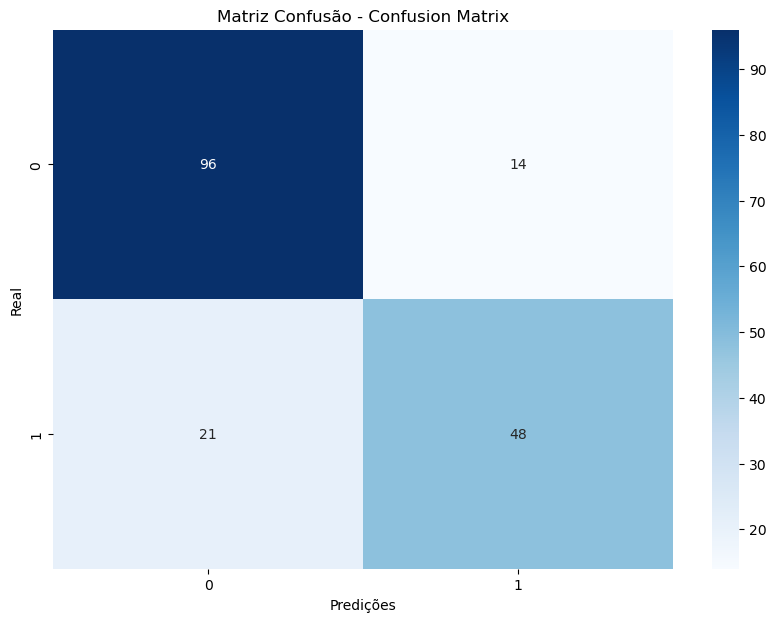

In [27]:
print('Matriz de Confusão:')
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_teste, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predições')
plt.ylabel('Real')
plt.title('Matriz Confusão - Confusion Matrix')
plt.show()

In [28]:
print('Relatório de Classificação:')
report = classification_report(y_teste, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report.head()

Relatório de Classificação:


,precision,recall,f1-score,support
0,0.820513,0.872727,0.845815,110.000000
1,0.774194,0.695652,0.732824,69.000000
accuracy,0.804469,0.804469,0.804469,0.804469
macro avg,0.797353,0.784190,0.789320,179.000000
weighted avg,0.802658,0.804469,0.802260,179.000000
